<h1> Esercizio n° 1 </h1>

 E noto che il numero di pezzi guasti fabbricati in una giornata di lavoro di una catena di produzione
 A segue una distribuzione di Poisson di media 2.
 1. Qual è la probabilità che in un giorno siano stati prodotti esattamente 3 pezzi guasti?
 2. Qual è la probabilità che in un giorno siano stati prodotti tra 2 e 5 pezzi guasti (estremi inclusi)?
 
 Si mette in opera una nuova catena di produzione B. E' noto che il numero di pezzi guasti fabbricati
 in una giornata di lavoro mediante B segue una distribuzione di Poisson di media 1.5.
 
 3. Si trovi la legge della variabile aleatoria che conta complessivemente il numero di pezzi guasti
 prodotti (ciè provenienti indifferentemente da A o da B) e si calcoli la sua media e la sua
 varianza.
 4. Qual è la probabilità che in un giorno siano stati prodotti complessivamente un numero di pezzi
 guasti compreso tra 3 e 6 (estremi inclusi)?

In [16]:
from scipy.stats import poisson

In [17]:
# 1
lambdaA = 2
p1 = poisson.pmf(3, lambdaA)
print(p1)

0.18044704431548356


In [18]:
# 2
p2 = sum([poisson.pmf(i, lambdaA) for i in range(2, 6)])
print(p2)

0.5774305418095474


A ~ Poisson(2)

B ~ Poisson(1.5)

A + B ~ Poisson(3.5)

In [19]:
# 3
lambdaB = 1.5
lambdaAB = lambdaA + lambdaB
print("Media complessiva: ", lambdaAB)
print("Varianza complessiva: ", lambdaAB)

Media complessiva:  3.5
Varianza complessiva:  3.5


In [20]:
# 4
p3 = sum([poisson.pmf(i, lambdaAB) for i in range(3, 7)])
print(p3)

0.6138647041089124


<h1> Esercizio n° 2 </h1>

Il contenuto di sodio (in milligrammi) di 30 scatole di cereali è riportato di seguito
 131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72,
 128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39,
 130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91,
 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65.

 1. Si calcoli la media campionaria, la deviazione standard e l’intervallo di confidenza per la media
 con livello di fiducia 0.01.
 2. Rappresentare graficamente i dati mediante un istogramma e mediante un box-plot.
 3. Si testi l’ipotesi che il contenuto medio di sodio sia di 130 mg utilizzando α = 0.05. Si calcoli il
 p-value del test precedente.
 4. E' possibile affermare che il contenuto di sodio è distribuito normalmente nelle scatole? Giustificare la risposta.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, probplot

In [22]:
# 1
dati = np.array([131.15, 130.69, 130.91, 129.54, 129.64, 128.77, 130.72,
                 128.33, 128.24, 129.65, 130.14, 129.29, 128.71, 129.00, 129.39,
                 130.42, 129.53, 130.12, 129.78, 130.92, 131.15, 130.69, 130.91,
                 129.54, 129.64, 128.77, 130.72, 128.33, 128.24, 129.65])

media = np.mean(dati)
dev = np.std(dati)

print("Media: ", media)
print("Deviazione standard: ", dev)

# Intervallo di confidenza al 99%
alpha = 0.01

def conf_int(media, dev, n, alpha):
    phi = norm.ppf(1 - alpha / 2)
    lower = media - (dev / np.sqrt(n)) * phi
    upper = media + (dev / np.sqrt(n)) * phi
    return lower, upper

def conf_int_t(media, dev, n, alpha):
    t_alpha = t.ppf(1 - alpha / 2, n - 1)
    lower = media - (dev / np.sqrt(n)) * t_alpha
    upper = media + (dev / np.sqrt(n)) * t_alpha
    return lower, upper

n = len(dati)
lower, upper = conf_int(media, dev, n, alpha)
print(f"Intervallo di confidenza al 99%: ({lower}, {upper})")

lower, upper = conf_int_t(media, dev, n, alpha)
print(f"Intervallo di confidenza al 99%: ({lower}, {upper})")

Media:  129.75266666666664
Deviazione standard:  0.9137393258230427
Intervallo di confidenza al 99%: (129.3229533932202, 130.1823799401131)
Intervallo di confidenza al 99%: (129.29283199986014, 130.21250133347314)


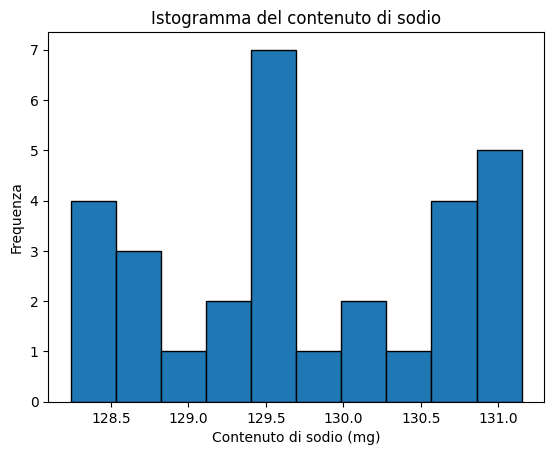

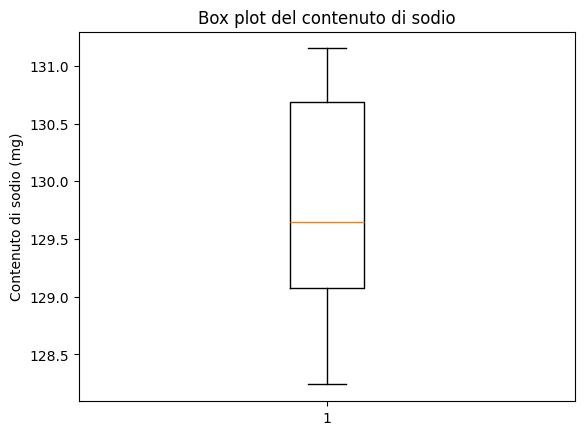

In [23]:
# 2

# Istogramma
plt.hist(dati, bins=10, edgecolor='black')
plt.title('Istogramma del contenuto di sodio')
plt.xlabel('Contenuto di sodio (mg)')
plt.ylabel('Frequenza')
plt.show()

# Box plot
plt.boxplot(dati)
plt.title('Box plot del contenuto di sodio')
plt.ylabel('Contenuto di sodio (mg)')
plt.show()

In [24]:
# 3
# Test di ipotesi (sulla media)
# H0: mu = 130
# H1: mu <> 130

mu0 = 130
alpha = 0.05
phi = norm.ppf(1 - alpha / 2)

def z_test(media, dev, mu0, n, phi):
    z = phi * (dev / np.sqrt(n))
    z1 = mu0 - z
    z2 = mu0 + z
    if media < z1 or media > z2:
        return True
    
def t_test(media, dev, mu0, n):
    T = (media - mu0) / dev * np.sqrt(n)
    if abs(T) > t.ppf(1 - alpha / 2, n - 1):
        return True

if z_test(media, dev, mu0, n, phi):
    print("Rigetto H0: la media non è 130")
else:
    print("Accetto H0: la media è 130")

if t_test(media, dev, mu0, n):
    print("Rigetto H0: la media non è 130")
else:
    print("Accetto H0: la media è 130")
    
# P-value
Z0 = np.abs(norm.ppf(1 - alpha / 2))
p_value = 2 * (1 - norm.cdf(Z0))
print("P-value: ", p_value)

Accetto H0: la media è 130
Accetto H0: la media è 130
P-value:  0.050000000000000044


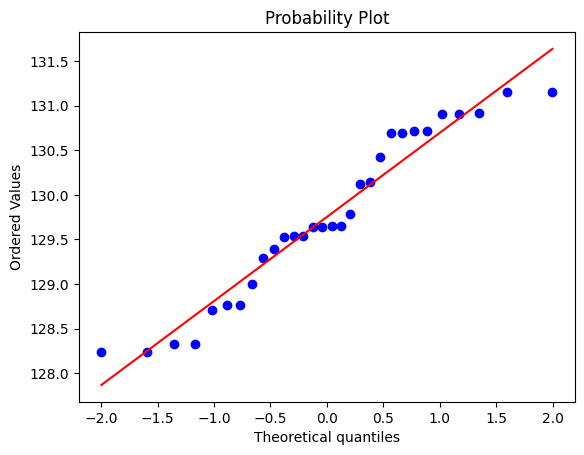

In [25]:
# 4
probplot(dati, dist=norm, plot=plt)
plt.show()

I dati non seguono una distribuzione normale.

<h1>Eserecizio n°3</h1>

Si consideri la catena di Markov sui vertici di un triangolo equilatero definita come segue. Ad ogni
istante ci si puo' spostare da un vertice a quello adiacente in senso orario con probabilità p e in senso
antiorario con probabilità 1 − p, con 0 < p < 1.
<ol>
    <li>Determinare la matrice di transizione.</li>
    <li>Fissato p = 1/3 mostrare che la catena è regolare.</li>
    <li>Fissato p = 1/3 determinare la distribuzione stazionaria.</li>
    <li>Indicato con E = {1,2,3} l’insieme degli stati, determinare il valore di p per cui la distribuzione
 uniforme su E sia reversibile.</li>
</ol>

In [26]:
# 1

def transition_matrix(p):
    return np.array([[0, 1-p, p],
                     [p, 0, 1-p],
                     [1-p, p, 0]])

# 2

p = 1/3
P = transition_matrix(p)

print("Matrice di transizione\n", P)
print("P^2\n", np.dot(P, P))
# é regolare perchè P^2 ha tutti i valori > 0

Matrice di transizione
 [[0.         0.66666667 0.33333333]
 [0.33333333 0.         0.66666667]
 [0.66666667 0.33333333 0.        ]]
P^2
 [[0.44444444 0.11111111 0.44444444]
 [0.44444444 0.44444444 0.11111111]
 [0.11111111 0.44444444 0.44444444]]


In [27]:
# 3
# Distribuzione stazionaria con metodo analitico

lam, V = np.linalg.eig(P.T)
print("Autovalori\n", lam)
print("Autovettori\n", V)

ind = np.argmax(lam)
pi = np.real(V[:, ind]) / np.sum(np.real(V[:, ind]))
print("Distribuzione stazionaria\n", pi)

# Distribuzione stazionaria con metodo Monte Carlo

n = 3
F = np.zeros(n)
N = 10**5

j = np.random.randint(n)
F[j] = 1

for i in range(N):
    j_multi = np.random.multinomial(1,P[j,:])
    j = np.nonzero(j_multi)[0][0]
    F[j] += 1

vv = F / N
print("Distribuzione stazionaria")
print(vv, "\n")

Autovalori
 [ 1. +0.j         -0.5+0.28867513j -0.5-0.28867513j]
Autovettori
 [[ 0.57735027+0.j  -0.57735027+0.j  -0.57735027-0.j ]
 [ 0.57735027+0.j   0.28867513+0.5j  0.28867513-0.5j]
 [ 0.57735027+0.j   0.28867513-0.5j  0.28867513+0.5j]]
Distribuzione stazionaria
 [0.33333333 0.33333333 0.33333333]
Distribuzione stazionaria
[0.33318 0.33281 0.33402] 



In [28]:
# 4

# Devo calcolare p tale che
# PIi Pij = PIj Pji
# 1/3 * p = 1/3 * (1-p)

p = 1/2
print("p = ", p)

p =  0.5
